# Face with highest probability

In [1]:
%reload_ext autoreload
%autoreload 2

In [24]:
from IPython.display import HTML
from fastai.core import *
from fastai.vision import *
from facenet_pytorch import MTCNN
from kgl_deepfake.nb_00 import *
from kgl_deepfake.nb_01b import *

### Data

In [8]:
SOURCE = Path('../data/train_sample_videos/')

In [9]:
f = get_files(SOURCE, extensions=['.json'])[0]
annots = pd.read_json(f).T
annots.reset_index(inplace=True)
annots.rename({'index':'fname'}, axis=1, inplace=True)
annots.head()

,fname,label,split,original
0,aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
1,aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
2,abarnvbtwb.mp4,REAL,train,None
3,abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
4,abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [12]:
fn = SOURCE/annots.fname[345]
fn

PosixPath('../data/train_sample_videos/edyncaijwx.mp4')

### Guy wearing a T-shirt with a face on it

In [25]:
HTML(html_vid(fn))

By default, `MTCNN`'s `select_largest` parameter is set to `True`, which means it returns the largest face (by area I think) detected.  

In [26]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
detector = MTCNN(device=device, post_process=False)

In [27]:
face = get_first_face(detector, fn)

0

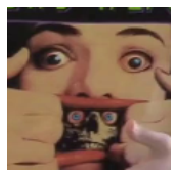

In [28]:
Image(face[1].type(torch.uint8)).show(); face[0]

By setting `select_largest` to `False`, it returns the face with the highest probability, which, in this case, returns the face of an actual person in the video.

In [29]:
detector = MTCNN(device=device, post_process=False, select_largest=False)

In [30]:
face = get_first_face(detector, fn)

0

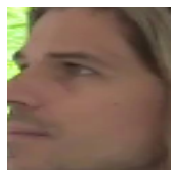

In [31]:
Image(face[1].type(torch.uint8)).show(); face[0]

If the face on the T-shirt happens to have the highest probability, then this will still return the T-shirt face.

# - fin